# Imports and data

In [1]:
import special_data_reader
import stats_utils
import model_utils
import numpy as np
import scipy.stats as stats
from matplotlib import pyplot as plt

In [2]:
pulls = special_data_reader.read_data(f'Data/Raw/pulls.csv')

# Goodness of fit analysis for null distribution

In [3]:
filtered_data = pulls[(pulls['grouped'] == 'f') & (pulls['rarity'] == 5) & (pulls['guaranteed'] == 'f') 
                    & (pulls['bannerId'] > 200000) & (pulls['bannerId'] < 300000)]

In [4]:
true_counts, expected_counts = stats_utils.null_goodness_of_fit_data(
    filtered_data, prob=0.006, pity_cutoff=90)

In [5]:
true_counts = true_counts[:-1]
expected_counts = expected_counts[:-1]

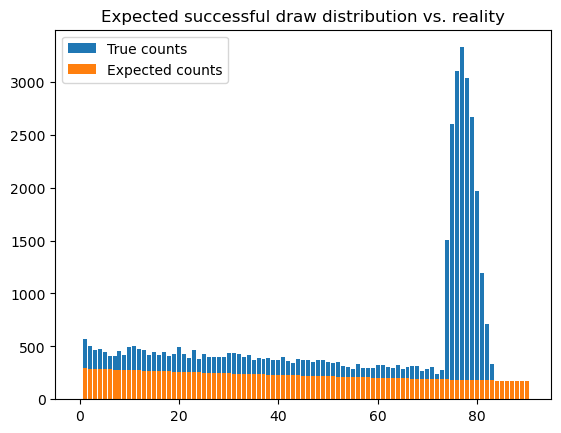

In [6]:
plt.clf()
plt.bar(list(range(len(true_counts))), true_counts, label='True counts')
plt.bar(list(range(len(expected_counts))), expected_counts, label='Expected counts')
plt.title('Expected successful draw distribution vs. reality')
plt.legend()
plt.show()

In [9]:
p_value = stats_utils.null_goodness_of_fit_test(
    pulls, prob=0.006, pity_cutoff=90)

In [10]:
p_value

0.0

# GOF for fit model

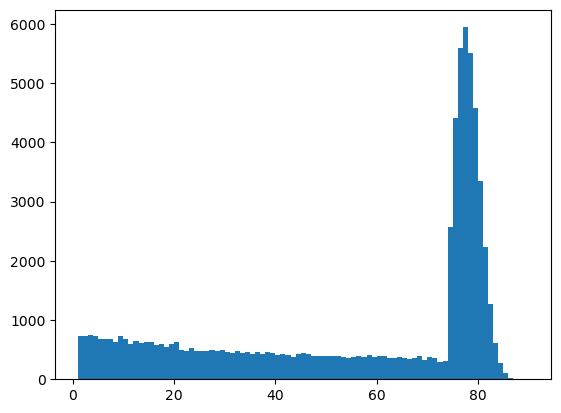

In [11]:
probs = model_utils.get_probs(pulls)

In [12]:
gaussian_mean = 76
gaussian_var = 2.45
cutoff = 73

fit_data = model_utils.fit_mixture(probs, gaussian_mean, gaussian_var, cutoff)

0.8815432098765431
gauss sum: 0.9248687107765219
geom sum: 0.4831354130670022


In [51]:
fit_data = np.array(fit_data) * true_counts.sum()

In [44]:
chi_square_test_statistic, p_value = stats.chisquare(
    true_counts[1:-1], f_exp=fit_data 
)


ValueError: For each axis slice, the sum of the observed frequencies must agree with the sum of the expected frequencies to a relative tolerance of 1e-08, but the percent differences are:
0.03903190321648938

In [45]:
fit_data

array([4.52211728e+02, 4.48141822e+02, 4.44108546e+02, 4.40111569e+02,
       4.36150565e+02, 4.32225210e+02, 4.28335183e+02, 4.24480166e+02,
       4.20659845e+02, 4.16873906e+02, 4.13122041e+02, 4.09403943e+02,
       4.05719307e+02, 4.02067834e+02, 3.98449223e+02, 3.94863180e+02,
       3.91309411e+02, 3.87787627e+02, 3.84297538e+02, 3.80838860e+02,
       3.77411310e+02, 3.74014609e+02, 3.70648477e+02, 3.67312641e+02,
       3.64006827e+02, 3.60730766e+02, 3.57484189e+02, 3.54266831e+02,
       3.51078430e+02, 3.47918724e+02, 3.44787455e+02, 3.41684368e+02,
       3.38609209e+02, 3.35561726e+02, 3.32541670e+02, 3.29548795e+02,
       3.26582856e+02, 3.23643611e+02, 3.20730818e+02, 3.17844241e+02,
       3.14983642e+02, 3.12148790e+02, 3.09339451e+02, 3.06555396e+02,
       3.03796397e+02, 3.01062229e+02, 2.98352669e+02, 2.95667495e+02,
       2.93006488e+02, 2.90369429e+02, 2.87756105e+02, 2.85166300e+02,
       2.82599803e+02, 2.80056405e+02, 2.77535897e+02, 2.75038074e+02,
      